### GPU

In [2]:
import pandas as pd
df = pd.read_csv('gpus.csv')
df.head(3)

,Manufacturer,Class,Name,Year,Fab,Transistors (mln),Die size,Memory size,Memory speed,GFLOPS,TDP
0,Nvidia,Desktop,GeForce 8300 GS,2007,80,210,127,512,6.4,14.4,40.0
1,Nvidia,Desktop,GeForce 8400 GS,2007,80,210,127,512,6.4,28.8,40.0
2,Nvidia,Desktop,GeForce 8400 GS rev.2,2007,65,210,86,512,6.4,24.4,25.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Manufacturer       495 non-null    object 
 1   Class              495 non-null    object 
 2   Name               495 non-null    object 
 3   Year               495 non-null    int64  
 4   Fab                495 non-null    int64  
 5   Transistors (mln)  495 non-null    int64  
 6   Die size           495 non-null    int64  
 7   Memory size        495 non-null    int64  
 8   Memory speed       495 non-null    float64
 9   GFLOPS             495 non-null    float64
 10  TDP                495 non-null    float64
dtypes: float64(3), int64(5), object(3)
memory usage: 42.7+ KB


In [4]:
max_transostors_per_year = df.groupby('Year')['Transistors (mln)'].max()
max_transostors_per_year

Year
2007      754
2008     1912
2009     4308
2010     3100
2011     6000
2012     7080
2013     8626
2014    14160
2015     8900
2016    17800
2017    21100
2018    21100
2019    26460
2020    54200
Name: Transistors (mln), dtype: int64

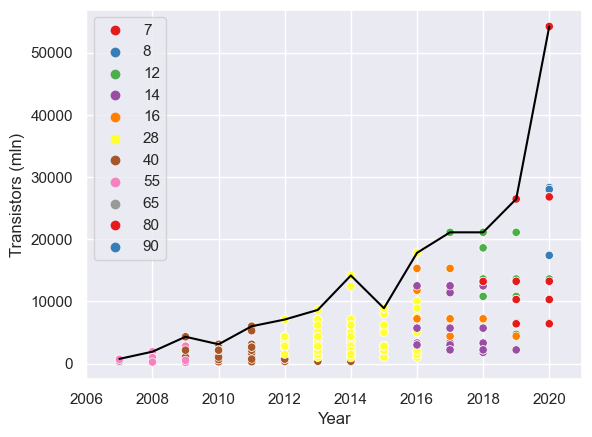

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# load seaborn's default frame and color palette
sns.set()
# scatter plot
ax = sns.scatterplot(x='Year', y = 'Transistors (mln)',hue = 'Fab',
                     legend = 'full', data = df,
                     palette = sns.color_palette('Set1',
                                                 n_colors = len(df.Fab.unique()))
                     )
# Line plot
sns.lineplot(data = max_transostors_per_year, ax = ax.axes, color = 'black')
ax.set_xlim(2006,2021)
plt.show()
# Transistors numbers double in every two years

In [6]:
# Create a new column for Transistor Density
df['Transistors/mm2'] = df['Transistors (mln)'] / df['Die size']
df.head(3)

,Manufacturer,Class,Name,Year,Fab,Transistors (mln),Die size,Memory size,Memory speed,GFLOPS,TDP,Transistors/mm2
0,Nvidia,Desktop,GeForce 8300 GS,2007,80,210,127,512,6.4,14.4,40.0,1.653543
1,Nvidia,Desktop,GeForce 8400 GS,2007,80,210,127,512,6.4,28.8,40.0,1.653543
2,Nvidia,Desktop,GeForce 8400 GS rev.2,2007,65,210,86,512,6.4,24.4,25.0,2.441860


(0.0, 70.0)

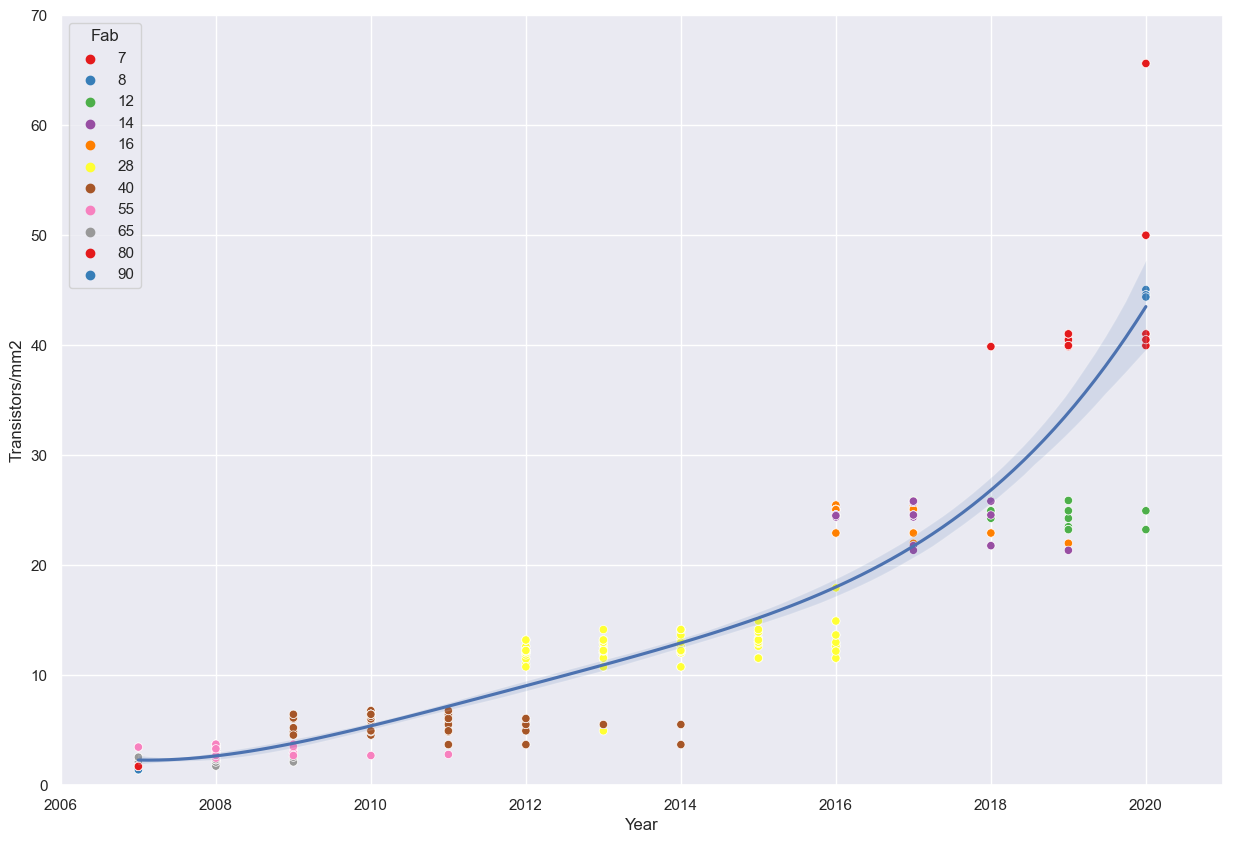

In [7]:
plt.figure(figsize = (15,10))
ax = sns.scatterplot(x='Year', y = 'Transistors/mm2',hue='Fab',
                     legend = 'full', data = df,
                     palette = sns.color_palette('Set1',
                                                 n_colors = len(df.Fab.unique()))
                     )
# regression plot
ax =  sns.regplot(x='Year', y = 'Transistors/mm2',
                  data = df, scatter = False,
                  ax = ax.axes, order = 4
                  )
ax.set_xlim(2006,2021)
ax.set_ylim(0,70)

In [8]:
# GPU's class vs TDP (temperature)
df['Class'].unique()

array(['Desktop', 'Workstation', 'Datacenter'], dtype=object)

In [9]:
df.describe()

,Year,Fab,Transistors (mln),Die size,Memory size,Memory speed,GFLOPS,TDP,Transistors/mm2
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,2012.880808,33.957576,4712.228283,307.777778,5493.793939,201.327709,3548.423818,145.768485,12.988545
std,3.681106,18.034835,6645.950201,210.542453,7834.893178,255.778339,5102.158541,98.177831,10.980187
min,2007.000000,7.000000,180.000000,57.000000,64.000000,3.200000,14.400000,12.000000,1.407025
25%,2010.000000,28.000000,754.000000,132.000000,1024.000000,51.200000,480.000000,59.000000,4.949153
50%,2013.000000,28.000000,2200.000000,256.000000,2048.000000,112.100000,1344.000000,134.000000,12.040816
75%,2016.000000,40.000000,6100.000000,438.000000,6144.000000,256.000000,4636.000000,225.000000,14.155251
max,2020.000000,90.000000,54200.000000,1192.000000,65536.000000,2048.000000,40000.000000,600.000000,65.617433


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


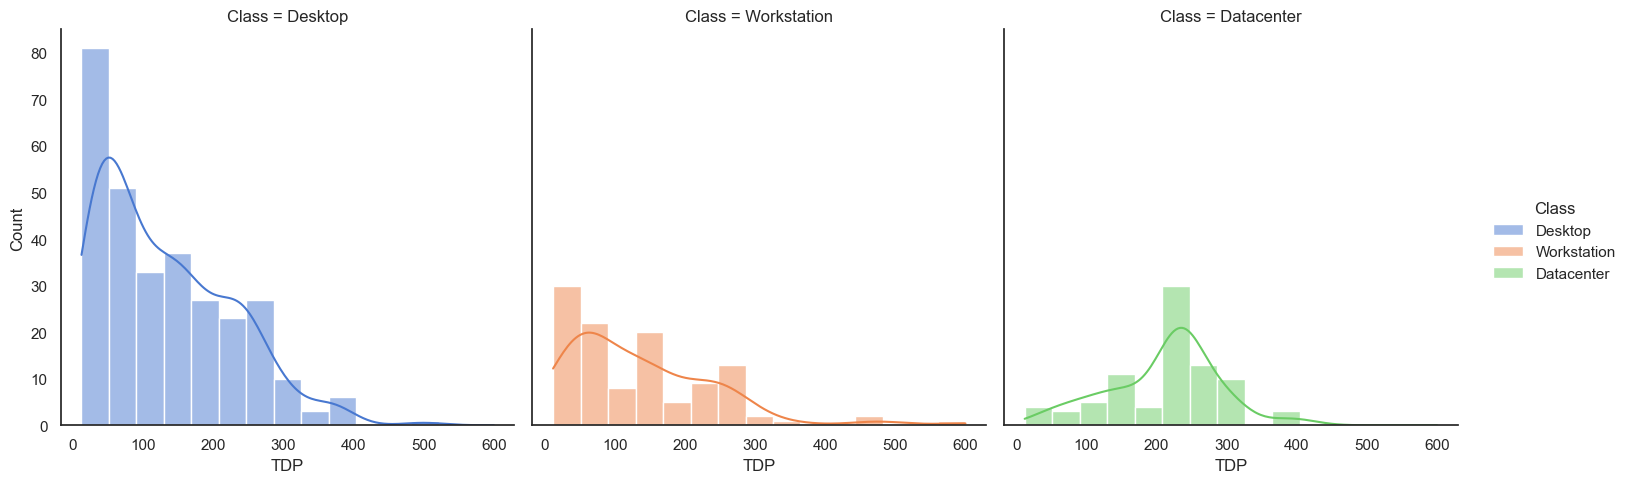

In [10]:
sns.set(style = 'white',palette = 'muted',color_codes = True)
# dustribution plot
sns.displot(data = df, x = 'TDP', hue = 'Class', col = 'Class',
            kde = True)

In [11]:
df.loc[df['Class']=='Desktop']['TDP'].skew()

0.8215194558499305

In [12]:
df.loc[df['Class']=='Workstation']['TDP'].skew()

1.5345385177070925

In [13]:
df.loc[df['Class']=='Datacenter']['TDP'].skew()
# skewness is between -0.5 & 0.5 data nearly symmetrical
# skewness is between -1 & -0.5 (negative skewed)
# skewness is between 0.5 & 1 (positive skewed)
# skewness is lower than -1 (extremely negative skewed)
# skewness is greater than 1 (extremely positive skewed)
# skewed means toward something

-0.27312304470699533

In [14]:
# TDP on FAB from 2 manufacturers
df['Manufacturer'].unique()

array(['Nvidia', 'AMD Radeon'], dtype=object)

In [15]:
sorted(df['Fab'].unique())

[7, 8, 12, 14, 16, 28, 40, 55, 65, 80, 90]

In [16]:
df.loc[df['Manufacturer']=='Nvidia']['TDP']

0       40.0
1       40.0
2       25.0
3       25.0
4       45.0
       ...  
240    400.0
241    250.0
242    320.0
243    350.0
244    220.0
Name: TDP, Length: 245, dtype: float64

In [17]:
df.loc[df['Manufacturer']=='Nvidia']['TDP'].describe()

count    245.000000
mean     152.057143
std       95.553654
min       12.000000
25%       64.000000
50%      150.000000
75%      225.000000
max      600.000000
Name: TDP, dtype: float64

In [18]:
df.loc[df['Manufacturer']=='AMD Radeon']['TDP'].describe()
# the mean TDP of Nvidia is higher than of AMD

count    250.000000
mean     139.605600
std      100.492429
min       15.000000
25%       55.000000
50%      122.500000
75%      218.750000
max      500.000000
Name: TDP, dtype: float64

[(0.0, 700.0)]

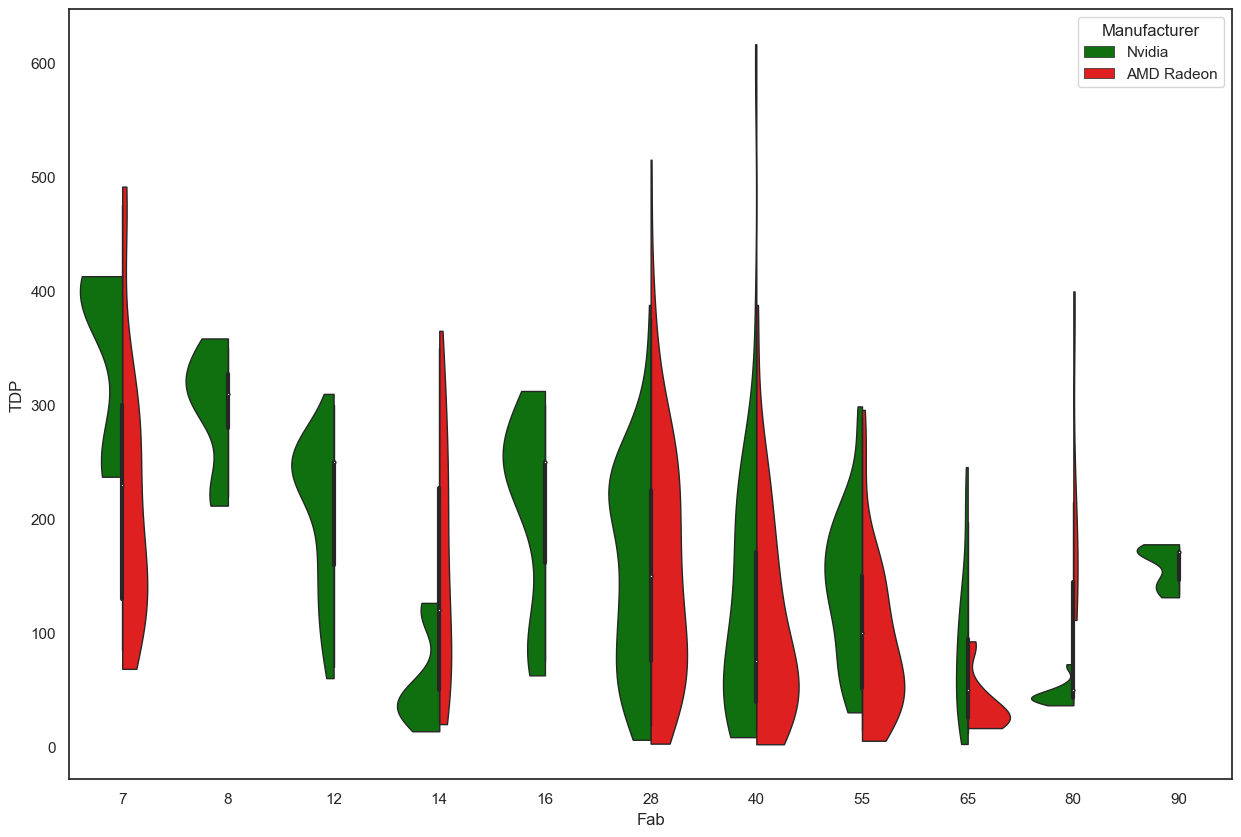

In [19]:
plt.figure(figsize = (15,10))
sns.violinplot(x = 'Fab',
               y = 'TDP',
               hue = 'Manufacturer',
               data = df,
               split = True,
               bw = .5,
               cut = 0.3,
               linewidth = 1,
               palette = sns.color_palette(['green','red']))
ax.set(ylim = (0,700))

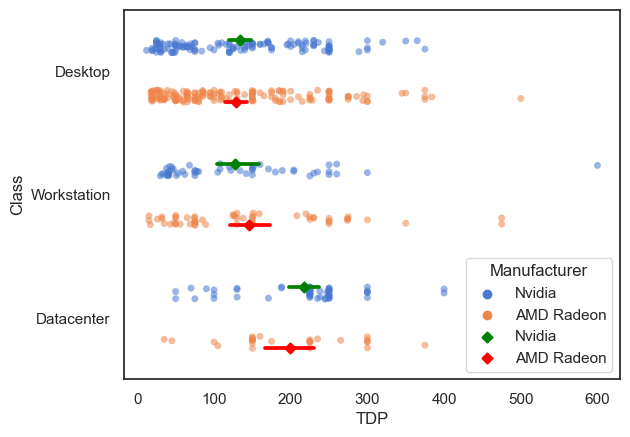

In [20]:
# Stripplot and Pointplot
import matplotlib.pyplot as plt
# ax = plt.subplots(fig)
sns.despine(bottom = True, left = True) # remove the bottom and left
sns.stripplot(x = 'TDP',y = 'Class', hue = 'Manufacturer',
              data = df, dodge = .5, alpha = .55, zorder =1)
# Strip plot is a single-axis scatter plot to visualize distruibution
# it aims to compare the range and dispersion of the observations
sns.pointplot(x = 'TDP',y = 'Class', hue = 'Manufacturer',
              data = df, dodge = .5, join = False,
              markers = 'D', scale = .75, errorbar = ('ci',95),
              palette = sns.color_palette(['green','red'])
              )
# point plot to show am estimate of central tendency for the distribution
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[2:],labels[2:],title = 'Class',
          handletextpad = 0, columnspacing = 1,
          loc = 'best',ncol = 2, frameon = True)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Axes: xlabel='Year', ylabel='GFLOPS'>

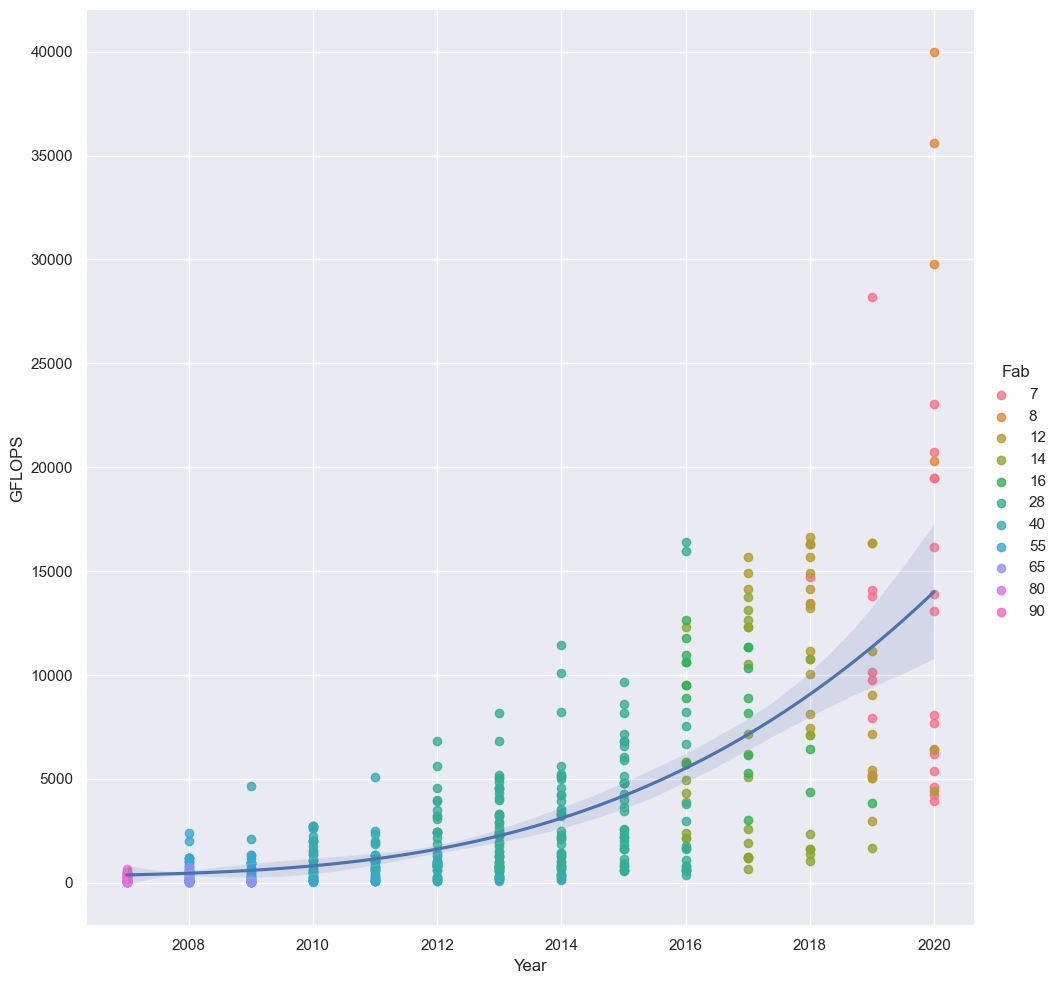

In [21]:
# Implot()
sns.set_theme()
sns.lmplot(x = 'Year',y = 'GFLOPS', data = df, hue = 'Fab',
           fit_reg = False, height = 10) # GFLOPS billion operation/s
sns.regplot(x = 'Year',y = 'GFLOPS', data = df, scatter = False,
           order = 3)

In [22]:
# Compare the number of GFLOPS per million transistors
df['GFLOPS/transistors'] = df['GFLOPS'] / df['Transistors (mln)']
df.head(3)

,Manufacturer,Class,Name,Year,Fab,Transistors (mln),Die size,Memory size,Memory speed,GFLOPS,TDP,Transistors/mm2,GFLOPS/transistors
0,Nvidia,Desktop,GeForce 8300 GS,2007,80,210,127,512,6.4,14.4,40.0,1.653543,0.068571
1,Nvidia,Desktop,GeForce 8400 GS,2007,80,210,127,512,6.4,28.8,40.0,1.653543,0.137143
2,Nvidia,Desktop,GeForce 8400 GS rev.2,2007,65,210,86,512,6.4,24.4,25.0,2.441860,0.116190


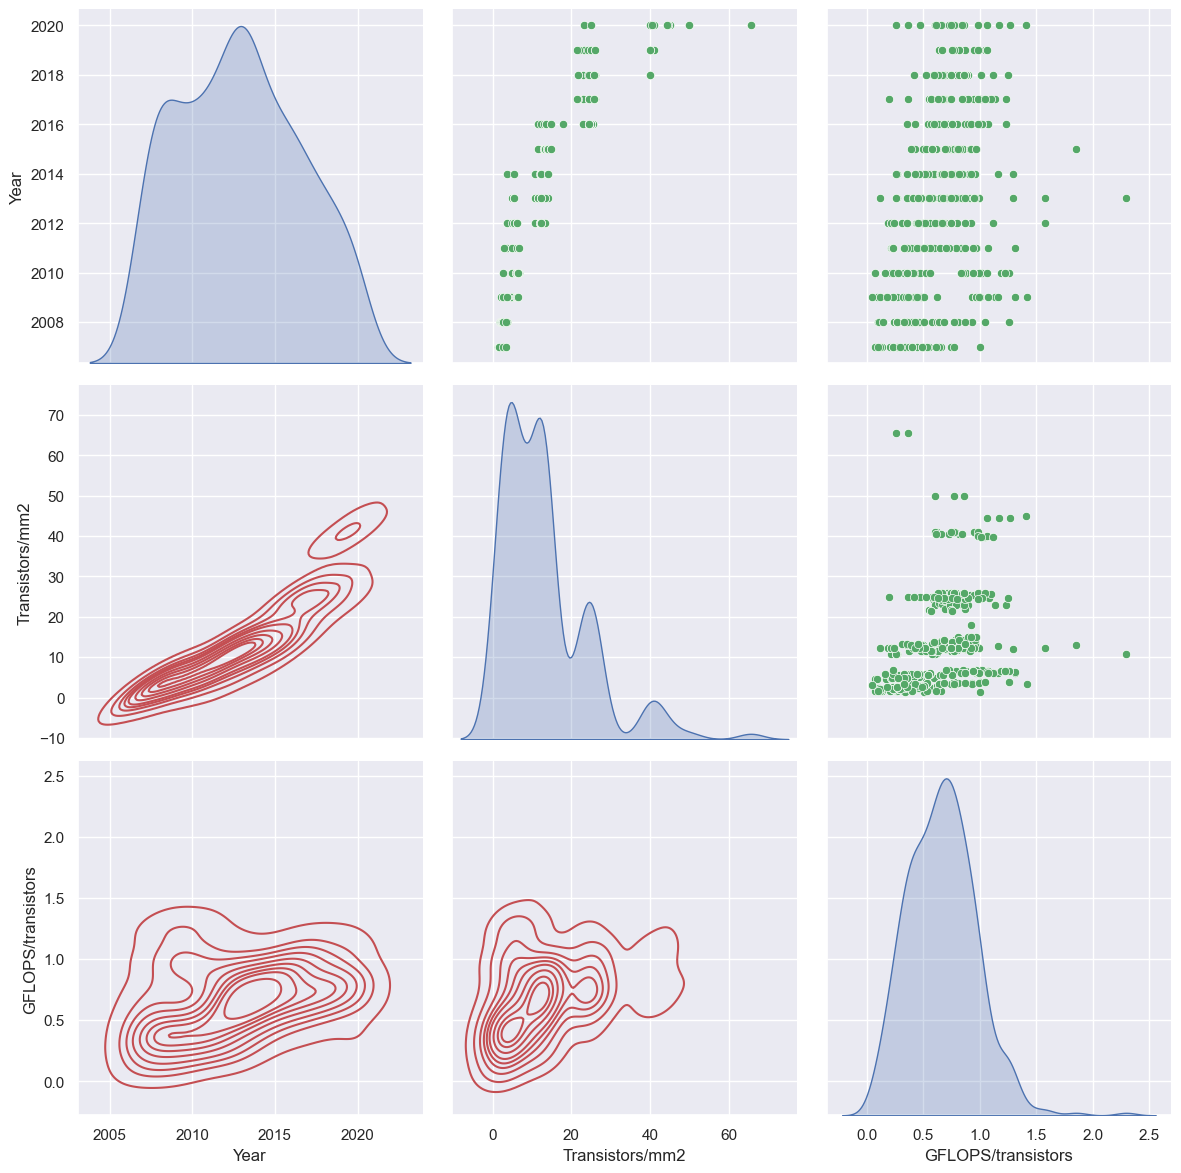

In [23]:
ax = sns.PairGrid(df[['Year','Transistors/mm2','GFLOPS/transistors']],
                  diag_sharey = False, height = 4)
# PairGrid uses different pair of variable for each subplot.
# it forms a matrix of subplots
ax.map_upper(sns.scatterplot, color = 'g')
ax.map_lower(sns.kdeplot, color = 'r')
ax.map_diag(sns.kdeplot, lw = 1, fill = True)
plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


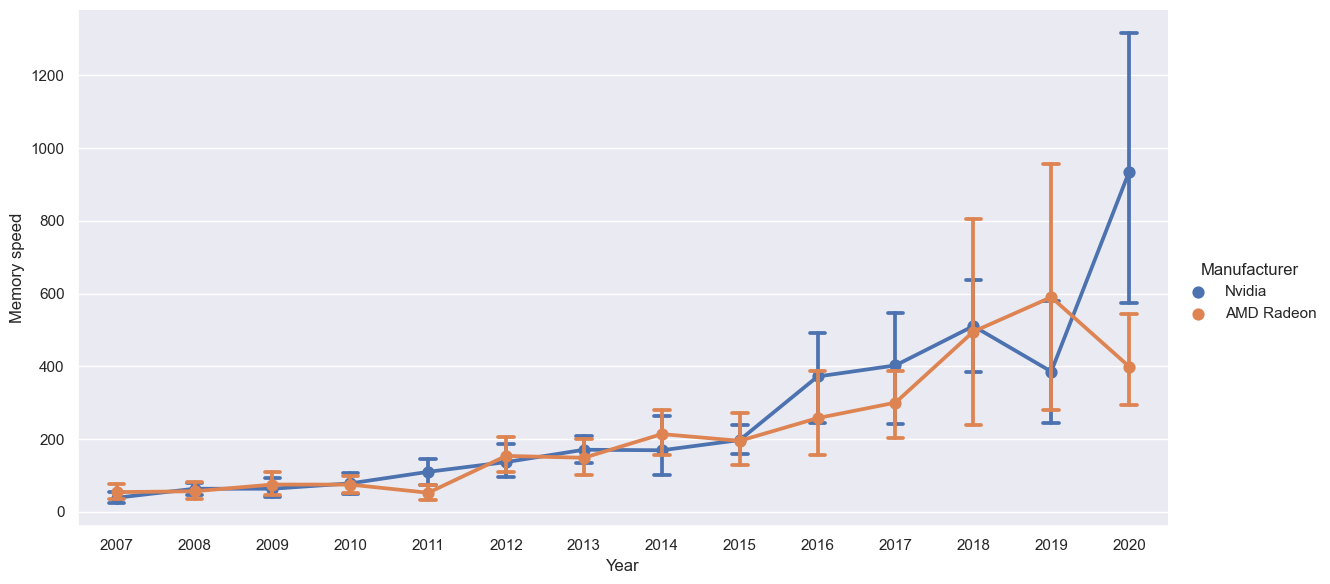

In [24]:
# Memory speed of two manufacturers
ax = sns.catplot(x ='Year', y = 'Memory speed', hue = 'Manufacturer',
                 height = 6, aspect = 2,capsize = .2, kind = 'point',
                 data = df)
# The point shows average speed
# Relative change between year *represented by line connect the dots
# 95% confidence interval *represented by the vertical line
# intersecting with the points
# Confidence interval suggests that more data should be collected
# before anything definite
plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


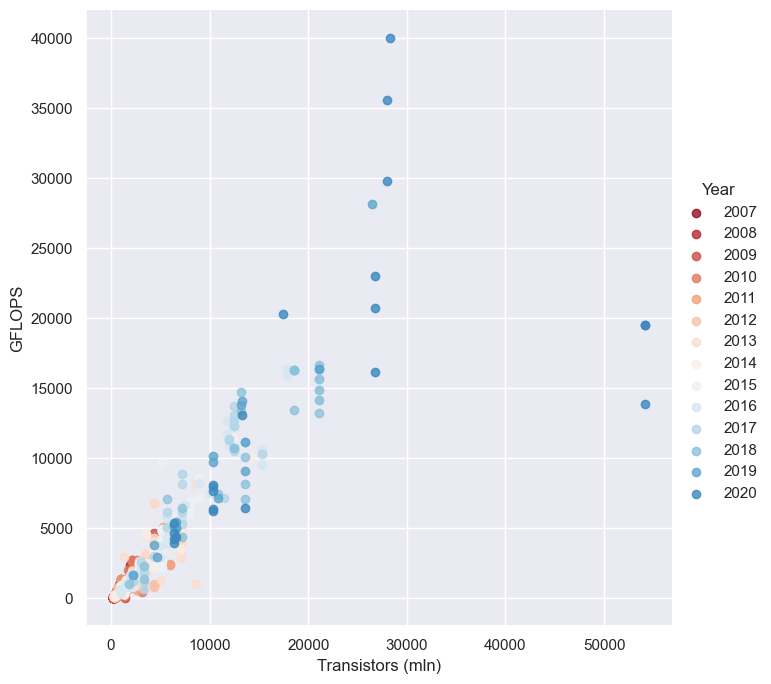

In [25]:
sns.lmplot(x = 'Transistors (mln)',y = 'GFLOPS', data = df, hue = 'Year',
           fit_reg = False,
           palette = sns.color_palette('RdBu',n_colors =16),
           height = 7)
sns.regplot(x = 'Transistors (mln)',y = 'GFLOPS', data = df,
           scatter = False, ax = ax.axes[0,0],
           order = 2)
ax.axes[0,0].set_xlim((0,57000))
plt.show()
# df.loc[df['Transistors (mln)'] == df['Transistors (mln)].max()]
# plt.text(44000,19000,'A100 SXM4')
# plt.text(45000,13000,'A100 PCIe')

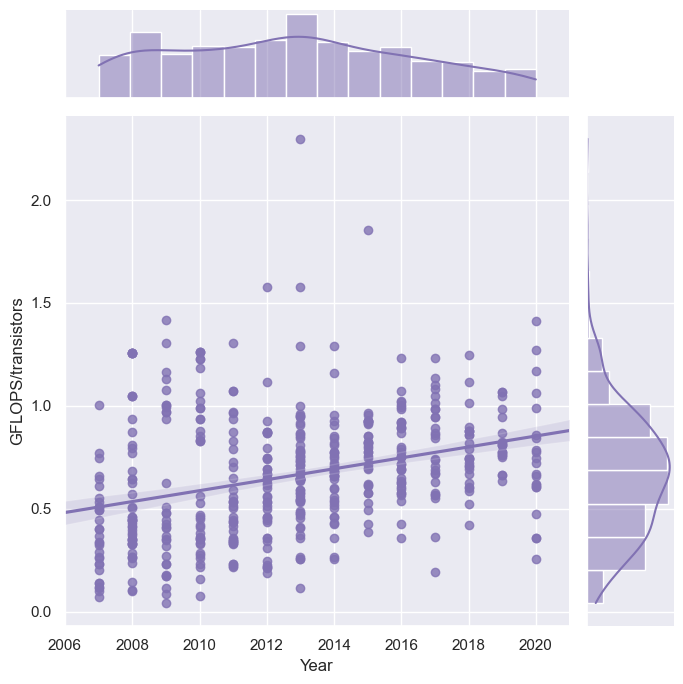

In [26]:
# growth of GFLOPS per number of transistors
sns.jointplot(x='Year',y='GFLOPS/transistors',data=df,
              kind='reg', truncate=False, marginal_kws={'bins':14},
              xlim=(2006,2021),color='m',height=7)
plt.show()

In [28]:
# Add drop down menu

plot.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=['type','scatter'],
                    label='Scatter Plot',
                    method='restyle'  # set the method to be called on click
                ),
                dict(
                    args=['type','bar'],
                    label='Bar chart',
                    method='restyle'
                )
            ]),
            direction='down'
        ),
    ]
)
plt.show()  #fig show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'update_layout'

In [ ]:
# Drop down menu by graph_object
import plotly.graph_objects as go
import numpy as np
np.random.seed(42)
random_x = np.random.randint(1,101,100) # int(start, end,no of samples)
random_y = np.random.randint(1,101,100)
plot = go.Figure(data=[go.Scatter(
    x=random_x,
    y=random_y,
    mode = 'markers'
    # mode = 'lines' Line plot
    # mode = 'markers' Scatter plot
    # mode = 'text' Displaytext
)])
# Add drop down menu
#
plot.update_layout(
    updatemenus = [
        dict(
            buttons = list([
                dict(
                    args = ['type','scatter'],
                    label = 'Scatter Plot',
                    method = 'restyle' # set the method to be called on click
                ),
                dict(
                    args = ['type','bar'],
                    label = 'Bar chat',
                    method = 'restyle'
                )
            ]),
            direction = 'down'
        ),
    ]
)

plot.show()

In [ ]:
import plotly.graph_objects as go
import numpy as np
np.random.seed(42)
random_x=np.random.randint(1,101,100)  # int (start,end,no. of samples)
random_y=np.random.randint(1,101,100)

x=['A','B','C','D']
plot=go.Figure(data=[go.Bar(
    name='Data 1',
    x=x,
    y=[100,200,500,673]
    ),
    go.Bar(
    name='Data 2',
    x=x,
    y=[56,123,982,213]
    )
    ])
# Add drop down
plot.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=[{'visible':[True,True]},{'title':'Both'}],
                    label='Both',
                    method='update'  # set the method to be called on click
                ),
                dict(
                    args=[{'visible':[True,False]},{'title':'Data 1'}],
                    label='Data 1',
                    method='update'
                ),
                 dict(
                    args=[{'visible':[False,True]},{'title':'Data 2'}],
                    label='Data 2',
                    method='update'
                )
            ]),
           
        ),
    ]
)
plot.show()

In [ ]:
import plotly.graph_objects as go
import numpy as np
np.random.seed(1)
x0 = np.random.normal(2,0.4,400)
y0 = np.random.normal(2,0.4,400)
x1 = np.random.normal(3,0.6,600)
y1 = np.random.normal(6,0.4,400)
x2 = np.random.normal(4,0.2,200)
y2 = np.random.normal(4,0.4,200)

fig = go.Figure()
# add trace 
#each set of data + graph type is a 'trace'
fig.add_trace(
    go.Scatter(
        x= x0,
        y=y0,
        mode='markers',
        marker=dict(color = 'Darkorange')
    )
)
#build a plot by using fig.add.trace(X)
#where X is a graph object (eg go.Scatter() or go.Bar())
fig.add_trace(
    go.Scatter(
        x= x1,
        y=y1,
        mode='markers',
        marker=dict(color = 'Crimson')
    )
)
fig.add_trace(
    go.Scatter(
        x= x2,
        y=y2,
        mode='markers',
        marker=dict(color = 'blue')
    )
)

In [ ]:
import plotly.graph_objects as go
import numpy as np

np.random.seed(1)
x0 = np.random.normal(2, 0.4, 400)
y0 = np.random.normal(2, 0.4, 400)
x1 = np.random.normal(3, 0.6, 600)
y1 = np.random.normal(6, 0.4, 400)
x2 = np.random.normal(4, 0.2, 200)
y2 = np.random.normal(4, 0.4, 200)

# create figure
fig = go.Figure()
# add 'trace'
# each set of data + graph type is a 'trace'
fig.add_trace(
    go.Scatter(
        x = x0,
        y = y0,
        mode ='markers',
        marker =dict(color = 'DarkOrange')
    )
)
# build a plot by using fig.add_trace(X)
# where X is a graph object (eg. go.Scatter() or go.Bar() )
fig.add_trace(
    go.Scatter(
        x = x1,
        y = y1,
        mode ='markers',
        marker =dict(color = 'Crimson')
    )
)
fig.add_trace(
    go.Scatter(
        x = x2,
        y = y2,
        mode ='markers',
        marker =dict(color = 'RebeccaPurple')
    )
)

# add button that add shapes

cluster0 =[dict(type = 'circle',
                xref = 'x', yref = 'y',
                x0 = min(x0), y0 = min(y0),
                x1 = max(x0), y1 = max(y0),
                line =dict(color = 'DarkOrange'))]

cluster1 =[dict(type = 'circle',
                xref = 'x', yref = 'y',
                x0 = min(x1), y0 = min(y1),
                x1 = max(x1), y1 = max(y1),
                line =dict(color = 'Crimson'))]

cluster2 =[dict(type = 'circle',
                xref = 'x', yref = 'y',
                x0 = min(x2), y0 = min(y2),
                x1 = max(x2), y1 = max(y2),
                line =dict(color = 'RebeccaPurple'))]

fig.update_layout(
    updatemenus =[
        dict(
            type ='buttons',
            buttons =[
                dict(
                    args = ['shapes',[]],
                    label = 'None',
                    method = 'relayout'
                    
                ),
                dict(
                    args = ['shapes',cluster0],
                    label = 'cluster0',
                    method = 'relayout'
                    
                ),
                dict(
                    args = ['shapes',cluster1],
                    label = 'cluster1',
                    method = 'relayout'
                    
                ),
                dict(
                    args = ['shapes',cluster2],
                    label = 'cluster2',
                    method = 'relayout'
                    
                ),
                dict(
                    args = ['shapes',cluster0+cluster1+cluster2],
                    label = 'All',
                    method = 'relayout'
                    
                )
            ]
        )
    ]
)

In [ ]:
# update remaining layout properties
fig.update_layout(
    title_text='Heighlight Clusters',
    showlegend =False
)
fig.show()

In [ ]:
# Add buttons that add shapes
cluster0=[dict(type='circle',
               xref='x',yref='y',
               x0=min(x0),y0=min(y0),
               x1=max(x0),y1=max(y0),
               line=dict(color='DarkOrange'))]
cluster1=[dict(type='circle',
               xref='x',yref='y',
               x0=min(x1),y0=min(y1),
               x1=max(x1),y1=max(y1),
               line=dict(color='Crimson'))]
cluster2=[dict(type='circle',
               xref='x',yref='y',
               x0=min(x2),y0=min(y2),
               x1=max(x2),y1=max(y2),
               line=dict(color='RebeccaPurple'))]
fig.update_layout(
    updatemenus=[
        dict(
            type='buttons',
            buttons=[
                dict(
                    args=['shapes',[]],
                    label='None',
                    method='relayout'  # set the method to be called on click
                ),
                dict(
                    args=['shapes',cluster0],
                    label='cluster0',
                    method='relayout' 
                ),
                dict(
                    args=['shapes',cluster1],
                    label='cluster1',
                    method='relayout' 
                ),
                dict(
                    args=['shapes',cluster2],
                    label='cluster2',
                    method='relayout' 
                ),
                dict(
                    args=['shapes',cluster0+cluster1+cluster2],
                    label='All',
                    method='relayout'      
                )
            ]
        )
    ]
)
# update remaining layout properties
fig.update_layout(
    title_text='Highlight Clusters',
    showlegend=False    
)
fig.show()

In [ ]:
import plotly.graph_objects as go 
fig = go.Figure(data = [go.Candlestick(x = AA.index,
                        open  = AA['Open'],
                        high  = AA['High'], 
                        low   = AA['Low'],
                        close = AA['Close'])]).update_layout(
                            title = 'Apple Share Price (Close) USD', 
                            yaxis_title = 'Close Price USD')
fig.show()

In [ ]:
import wbgapi as wb
BB = wb.data.DataFrame(['NY.GDP.PCAP.CD'],['HKG']).T
print(BB.head(3))
print(BB.tail(3))

In [ ]:
import plotly.express as px
fig = px.bar(BB, x = BB.index, y='HKG',
            title = 'HK GPD per capita (USD)').update_layout(
                xaxis_title='GDP per capita USD', yaxis_title='Year'
            )
fig.show()

In [ ]:
# px.sunburst
import plotly.express as px
CC = px.data.gapminder().query('year == 2007')
print(CC.head(3))
fig = px.sunburst(CC, path=['continent','country'],
                  values='pop', color='lifeExp',
                  hover_data=['iso_alpha'])
fig.show()

In [ ]:
# Plotly.Pie
import plotly.express as px
DD = px.data.gapminder().query('year == 2007').query(
    "continent == 'Europe'")
DD.loc[DD['pop']<2.e6,'country']='Other countries'
fig = px.pie(DD,values='pop',names='country',
             title='Population of European continent')
fig.show()

In [ ]:
import plotly.express as px
EE = px.data.gapminder()
fig = px.choropleth(EE, locations='iso_alpha',
                    color = 'lifeExp',
                    hover_name = 'country',
                    animation_frame='year',
                    range_color=[20,80])
fig.show()

In [ ]:
#https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Crab_Nebula.jpg/240px-Crab_Nebula.jpg